In [2]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np


pd.set_option('display.max_columns', 40)

In [3]:
path = "C:\\Users\\chain\\2nd year\\datasci\\project\\ScopusData2018-2023\\ScopusData2018-2023"
filenames = []
for year in range(2018,2021 ):
    folder = f"{path}\\{year}"
    temp = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    filenames += temp
print(len(filenames))

9267


In [5]:
data = pd.DataFrame()
n = 0 
N = len(filenames)
for filename in filenames:
    file_path = f"{path}\\{filename[0:4]}\\{filename}"
    temp = pd.read_json(file_path).T
    data = pd.concat([data, temp], axis=0, ignore_index=True)
    n+=1
    print(f"\r{n}/{N}" , end = "")
data.index = filenames
data


9267/9267

,item,affiliation,coredata,idxterms,language,authkeywords,subject-areas,authors
201800000,{'ait:process-info': {'ait:status': {'@state':...,"[{'affiliation-city': 'Stanford', '@id': '6003...","{'srctype': 'b', 'eid': '2-s2.0-85077976956', ...",None,{'@xml:lang': 'eng'},None,"{'subject-area': [{'@_fa': 'true', '$': 'Medic...","{'author': [{'ce:given-name': 'Krit', 'preferr..."
201800001,{'ait:process-info': {'ait:status': {'@state':...,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'srctype': 'p', 'eid': '2-s2.0-85060936020', ...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,"{'subject-area': [{'@_fa': 'true', '$': 'Elect...","{'author': [{'ce:given-name': 'Teerapong', 'pr..."
201800002,{'ait:process-info': {'ait:status': {'@state':...,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'srctype': 'j', 'eid': '2-s2.0-85052201238', ...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...","{'subject-area': [{'@_fa': 'true', '$': 'Chemi...","{'author': [{'ce:given-name': 'Kiattikhoon', '..."
201800003,{'ait:process-info': {'ait:status': {'@state':...,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'srctype': 'j', 'eid': '2-s2.0-85051498032', ...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...","{'subject-area': [{'@_fa': 'true', '$': 'Chemi...","{'author': [{'ce:given-name': 'Jittraporn', 'p..."
201800004,{'ait:process-info': {'ait:status': {'@state':...,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'srctype': 'j', 'eid': '2-s2.0-85050678366', ...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...","{'subject-area': [{'@_fa': 'true', '$': 'Analy...","{'author': [{'ce:given-name': 'Prinjaporn', 'p..."
...,...,...,...,...,...,...,...,...
202003388,{'ait:process-info': {'ait:status': {'@state':...,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'srctype': 'j', 'eid': '2-s2.0-85063582476', ...","{'mainterm': [{'$': 'Aged', '@weight': 'b', '@...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Che...","{'subject-area': [{'@_fa': 'true', '$': 'Oncol...","{'author': [{'ce:given-name': 'Kitsada', 'pref..."
202003389,{'ait:process-info': {'ait:status': {'@state':...,"{'affiliation-city': 'Bangkok', '@id': '601995...","{'srctype': 'j', 'eid': '2-s2.0-85059773899', ...",None,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Ass...","{'subject-area': [{'@_fa': 'true', '$': 'Finan...","{'author': [{'ce:given-name': 'Roongkiat', 'pr..."
202003390,{'ait:process-info': {'ait:status': {'@state':...,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'srctype': 'j', 'eid': '2-s2.0-85046082672', ...",None,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Per...","{'subject-area': [{'@_fa': 'true', '$': 'Socia...","{'author': [{'ce:given-name': 'Narut', 'prefer..."
202003391,{'ait:process-info': {'ait:status': {'@state':...,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'srctype': 'j', 'eid': '2-s2.0-85044754290', ...",None,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Col...","{'subject-area': [{'@_fa': 'true', '$': 'Socia...","{'author': [{'ce:given-name': 'Chanakan', 'pre..."


In [ ]:
data

In [6]:

def isColDict(col):
    for data in col:
        if (type(data) != dict):
            return False
    return True
def expandDict(df:pd.DataFrame):
    columns = df.columns
    toRemove = []
    for col in columns:
        if (isColDict(df[col])):
            print(df[col], df.shape , "\r", end="")
            expanded = pd.DataFrame(df[col].tolist(),index= df.index)
            toRemove.append(col)
            df = pd.concat([df, expanded] , axis = 1 )
            print(col, df.shape ,"finished\n-------------")
    df.drop(labels=toRemove, axis = 1,inplace=True)
    if(len(toRemove) == 0):
        return df
    else:
        return expandDict(df)
data2 = expandDict(data)
data2

201800000    {'ait:process-info': {'ait:status': {'@state':...
201800001    {'ait:process-info': {'ait:status': {'@state':...
201800002    {'ait:process-info': {'ait:status': {'@state':...
201800003    {'ait:process-info': {'ait:status': {'@state':...
201800004    {'ait:process-info': {'ait:status': {'@state':...
                                   ...                        
202003388    {'ait:process-info': {'ait:status': {'@state':...
202003389    {'ait:process-info': {'ait:status': {'@state':...
202003390    {'ait:process-info': {'ait:status': {'@state':...
202003391    {'ait:process-info': {'ait:status': {'@state':...
202003392    {'ait:process-info': {'ait:status': {'@state':...


item (9267, 11) finished
-------------
201800000    {'srctype': 'b', 'eid': '2-s2.0-85077976956', ...
201800001    {'srctype': 'p', 'eid': '2-s2.0-85060936020', ...
201800002    {'srctype': 'j', 'eid': '2-s2.0-85052201238', ...
201800003    {'srctype': 'j', 'eid': '2-s2.0-85051498032', ...
201800004    {'srctype': 'j', 'eid': '2-s2.0-85050678366', ...
                                   ...                        
202003388    {'srctype': 'j', 'eid': '2-s2.0-85063582476', ...
202003389    {'srctype': 'j', 'eid': '2-s2.0-85059773899', ...
202003390    {'srctype': 'j', 'eid': '2-s2.0-85046082672', ...
202003391    {'srctype': 'j', 'eid': '2-s2.0-85044754290', ...
202003392    {'srctype': 'j', 'eid': '2-s2.0-85030635652', ...
coredata (9267, 41) finished, dtype: object (9267, 11) 
-------------
201800000    {'subject-area': [{'@_fa': 'true', '$': 'Medic...
201800001    {'subject-area': [{'@_fa': 'true', '$': 'Elect...
201800002    {'subject-area': [{'@_fa': 'true', '$': 'Chemi...
201800003

,affiliation,idxterms,language,authkeywords,xocs:meta,srctype,eid,prism:coverDate,prism:aggregationType,prism:url,subtypeDescription,link,prism:isbn,prism:publicationName,source-id,citedby-count,subtype,prism:pageRange,dc:title,prism:endingPage,...,manufacturergroup,sequencebanks,descriptorgroup,$,@type,itemid,ce:doi,ce:pii,ce:ern,@code,@first,month,year,date-text,day,classifications,@day,@timestamp,@year,@month
201800000,"[{'affiliation-city': 'Stanford', '@id': '6003...",None,{'@xml:lang': 'eng'},None,NaN,b,2-s2.0-85077976956,2018-12-31,Book,https://api.elsevier.com/content/abstract/scop...,Book Chapter,"[{'@_fa': 'true', '@rel': 'self', '@href': 'ht...","[{'$': '9783319984858'}, {'$': '9783319984841'}]","Radiology in Global Health: Strategies, Implem...",21100942340,1,ch,175-183,Public health and international epidemiology f...,183,...,NaN,NaN,NaN,"Copyright 2020 Elsevier B.V., All rights reser...",Elsevier,"[{'$': '630657031', '@idtype': 'PUI'}, {'$': '...",10.1007/978-3-319-98485-8_15,NaN,NaN,ch,2018,12,2018,"{'@xfab-added': 'true', '$': '31 December 2018'}",31,"[{'@type': 'ASJC', 'classification': '2700'}, ...",19,BST 23:00:00,2020,05
201800001,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,{'xocs:funding-list': {'@pui-match': 'primary'...,p,2-s2.0-85060936020,2018-12-31,Conference Proceeding,https://api.elsevier.com/content/abstract/scop...,Conference Paper,"[{'@_fa': 'true', '@rel': 'self', '@href': 'ht...",9784885523151,Progress in Electromagnetics Research Symposium,21000195302,1,cp,1538-1541,Flexible Printed Active Antenna for Digital Te...,1541,...,NaN,NaN,NaN,"Copyright 2019 Elsevier B.V., All rights reser...",Elsevier,"[{'$': '626207135', '@idtype': 'PUI'}, {'$': '...",10.23919/PIERS.2018.8597669,NaN,NaN,cp,2018,12,2018,"{'@xfab-added': 'true', '$': '31 December 2018'}",31,"[{'@type': 'ASJC', 'classification': [{'$': '2...",06,BST 05:46:24,2019,02
201800002,"{'affiliation-city': 'Bangkok', '@id': '600281...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...",{'xocs:funding-list': {'@pui-match': 'primary'...,j,2-s2.0-85052201238,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,"[{'@_fa': 'true', '@rel': 'self', '@href': 'ht...",NaN,Chemical Engineering Science,16413,21,ar,1041-1057,Parametric study of hydrogen production via so...,1057,...,NaN,NaN,NaN,"Copyright 2020 Elsevier B.V., All rights reser...",Elsevier,"[{'$': '2001055921', '@idtype': 'PUI'}, {'$': ...",10.1016/j.ces.2018.08.042,S0009250918306183,NaN,ar,2018,12,2018,31 December 2018,31,"[{'@type': 'CPXCLASS', 'classification': [{'cl...",06,BST 11:39:51,2020,10
201800003,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...",{'xocs:funding-list': {'@pui-match': 'primary'...,j,2-s2.0-85051498032,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,"[{'@_fa': 'true', '@rel': 'self', '@href': 'ht...",NaN,Applied Surface Science,28983,37,ar,164-174,Superhydrophobic coating from fluoroalkylsilan...,174,...,NaN,NaN,NaN,"Copyright 2019 Elsevier B.V., All rights reser...",Elsevier,"[{'$': '2001028363', '@idtype': 'PUI'}, {'$': ...",10.1016/j.apsusc.2018.08.059,S0169433218321792,NaN,ar,2018,12,2018,31 December 2018,31,"[{'@type': 'CPXCLASS', 'classification': [{'cl...",20,BST 16:05:30,2019,02
201800004,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...",{'xocs:funding-list': {'@pui-match': 'primary'...,j,2-s2.0-85050678366,2018-12-31,Journal,https://api.elsevier.com/content/abstract/scop...,Article,"[{'@_fa': 'true', '@rel': 'self', '@href': 'ht...",NaN,Analytica Chimica Acta,23911,68,ar,102-109,Electrochemical impedanc

In [7]:
print(data2.shape)
data2["link"]

(9267, 100)


201800000    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
201800001    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
201800002    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
201800003    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
201800004    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
                                   ...                        
202003388    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
202003389    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
202003390    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
202003391    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
202003392    [{'@_fa': 'true', '@rel': 'self', '@href': 'ht...
Name: link, Length: 9267, dtype: object

In [8]:
df = data2.loc[:, ~data2.columns.duplicated(keep='first')]

# 2. Define patterns to remove
drop_patterns = [
    '@',          # all XML attribute fields like @year, @type, etc.
    'ce:', "url", "link",      # internal Scopus tags
    'codencode', 'pii', 'itemid', '$',"eid", "issn",
    'tradenamegroup', 'chemicalgroup', 'manufacturergroup',
    'sequencebanks', 'descriptorgroup', "source-id","doi", "identifier",
    'volisspag', 'part', 'volumetitle',"tail","date-text","classifications",
    'preferred-sourcetitle', 'additional-srcinfo', 'issuetitle',
    'translated-sourcetitle', "prism:aggregationType", "subtypeDescription" ,"subtype",	"classifications",
    'dbcollection', 'external-source',
    'citation-language', 'abstract-language',
    'publishercopyright', 'article-number', 'prism:pageRange',
    'prism:startingPage', 'prism:endingPage',
    'xocs:meta', 'related-item', 'sourcetitle-abbrev', 'website',
    'author-group', 'contributor-group', 'grantlist', 'citation-title'
]

# 3. Drop any columns that match these patterns
to_drop = [c for c in df.columns if any(p in c for p in drop_patterns)]
df = df.drop(columns=to_drop, errors='ignore')
print(df.shape)
df

(9267, 28)


,affiliation,idxterms,language,authkeywords,srctype,prism:coverDate,prism:isbn,prism:publicationName,citedby-count,dc:title,openaccess,openaccessFlag,dc:publisher,dc:description,prism:volume,pubmed-id,prism:issueIdentifier,subject-area,author,abstracts,correspondence,author-keywords,isbn,publisher,sourcetitle,month,year,day
201800000,"[{'affiliation-city': 'Stanford', '@id': '6003...",None,{'@xml:lang': 'eng'},None,b,2018-12-31,"[{'$': '9783319984858'}, {'$': '9783319984841'}]","Radiology in Global Health: Strategies, Implem...",1,Public health and international epidemiology f...,0,false,Springer International Publishing,NaN,NaN,NaN,NaN,"[{'@_fa': 'true', '$': 'Medicine (all)', '@cod...","[{'ce:given-name': 'Krit', 'preferred-name': {...",None,"{'affiliation': {'country': 'Thailand', '@coun...",NaN,"[{'@level': 'volume', '$': '9783319984858', '@...",{'publishername': 'Springer International Publ...,"Radiology in Global Health: Strategies, Implem...",12,2018,31
201800001,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,p,2018-12-31,9784885523151,Progress in Electromagnetics Research Symposium,1,Flexible Printed Active Antenna for Digital Te...,0,false,Institute of Electrical and Electronics Engine...,This paper presents the development of a flexi...,2018-August,NaN,NaN,"[{'@_fa': 'true', '$': 'Electrical and Electro...","[{'ce:given-name': 'Teerapong', 'preferred-nam...","© 2018 The Institute of Electronics, Informati...",NaN,NaN,"{'@level': 'volume', '$': '9784885523151', '@t...",{'publishername': 'Institute of Electrical and...,Progress in Electromagnetics Research Symposium,12,2018,31
201800002,"{'affiliation-city': 'Bangkok', '@id': '600281...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...",j,2018-12-31,NaN,Chemical Engineering Science,21,Parametric study of hydrogen production via so...,0,false,Elsevier Ltd,Computational fluid dynamics was applied for s...,192,NaN,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Kiattikhoon', 'preferred-n...",© 2018 Elsevier LtdComputational fluid dynamic...,"{'affiliation': {'country': 'Thailand', 'posta...",{'author-keyword': [{'$': 'Circulating fluidiz...,NaN,{'publishername': 'Elsevier Ltd'},Chemical Engineering Science,12,2018,31
201800003,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...",j,2018-12-31,NaN,Applied Surface Science,37,Superhydrophobic coating from fluoroalkylsilan...,0,false,Elsevier B.V.,A superhydrophobic/superoleophilic mesh was su...,462,NaN,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Jittraporn', 'preferred-na...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"{'affiliation': {'country': 'Thailand', 'posta...","{'author-keyword': [{'$': 'Encapsulation', '@x...",NaN,{'publishername': 'Elsevier B.V.'},Applied Surface Science,12,2018,31
201800004,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...",j,2018-12-31,NaN,Analytica Chimica Acta,68,Electrochemical impedance-based DNA sensor usi...,0,false,Elsevier B.V.,A label-free electrochemical DNA sensor based ...,1044,30442390,NaN,"[{'@_fa': 'true', '$': 'Analytical Chemistry',...","[{'ce:given-name': 'Prinjaporn', 'preferred-na...",© 2018 Elsevier B.V. A label-free electrochemi...,"{'affiliation': {'country': 'United States', '...","{'author-keyword': [{'$': 'acpcPNA', '@xml:lan...",NaN,{'publishername': 'Elsevier B.V.'},Analytica Chimica Acta,12,2018,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202003388,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'Aged',

EDA

In [9]:
%pip install missingno

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [10]:
import missingno as msno
import matplotlib.pyplot as plt

In [11]:
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

df.info()

Shape: (9267, 28)

Column names:
 ['affiliation', 'idxterms', 'language', 'authkeywords', 'srctype', 'prism:coverDate', 'prism:isbn', 'prism:publicationName', 'citedby-count', 'dc:title', 'openaccess', 'openaccessFlag', 'dc:publisher', 'dc:description', 'prism:volume', 'pubmed-id', 'prism:issueIdentifier', 'subject-area', 'author', 'abstracts', 'correspondence', 'author-keywords', 'isbn', 'publisher', 'sourcetitle', 'month', 'year', 'day']
<class 'pandas.core.frame.DataFrame'>
Index: 9267 entries, 201800000 to 202003392
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   affiliation            9267 non-null   object
 1   idxterms               5474 non-null   object
 2   language               9220 non-null   object
 3   authkeywords           7495 non-null   object
 4   srctype                9267 non-null   object
 5   prism:coverDate        9267 non-null   object
 6   prism:isbn             949 n

In [12]:
firstVisualization = df.copy()
firstVisualization

,affiliation,idxterms,language,authkeywords,srctype,prism:coverDate,prism:isbn,prism:publicationName,citedby-count,dc:title,openaccess,openaccessFlag,dc:publisher,dc:description,prism:volume,pubmed-id,prism:issueIdentifier,subject-area,author,abstracts,correspondence,author-keywords,isbn,publisher,sourcetitle,month,year,day
201800000,"[{'affiliation-city': 'Stanford', '@id': '6003...",None,{'@xml:lang': 'eng'},None,b,2018-12-31,"[{'$': '9783319984858'}, {'$': '9783319984841'}]","Radiology in Global Health: Strategies, Implem...",1,Public health and international epidemiology f...,0,false,Springer International Publishing,NaN,NaN,NaN,NaN,"[{'@_fa': 'true', '$': 'Medicine (all)', '@cod...","[{'ce:given-name': 'Krit', 'preferred-name': {...",None,"{'affiliation': {'country': 'Thailand', '@coun...",NaN,"[{'@level': 'volume', '$': '9783319984858', '@...",{'publishername': 'Springer International Publ...,"Radiology in Global Health: Strategies, Implem...",12,2018,31
201800001,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,p,2018-12-31,9784885523151,Progress in Electromagnetics Research Symposium,1,Flexible Printed Active Antenna for Digital Te...,0,false,Institute of Electrical and Electronics Engine...,This paper presents the development of a flexi...,2018-August,NaN,NaN,"[{'@_fa': 'true', '$': 'Electrical and Electro...","[{'ce:given-name': 'Teerapong', 'preferred-nam...","© 2018 The Institute of Electronics, Informati...",NaN,NaN,"{'@level': 'volume', '$': '9784885523151', '@t...",{'publishername': 'Institute of Electrical and...,Progress in Electromagnetics Research Symposium,12,2018,31
201800002,"{'affiliation-city': 'Bangkok', '@id': '600281...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...",j,2018-12-31,NaN,Chemical Engineering Science,21,Parametric study of hydrogen production via so...,0,false,Elsevier Ltd,Computational fluid dynamics was applied for s...,192,NaN,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Kiattikhoon', 'preferred-n...",© 2018 Elsevier LtdComputational fluid dynamic...,"{'affiliation': {'country': 'Thailand', 'posta...",{'author-keyword': [{'$': 'Circulating fluidiz...,NaN,{'publishername': 'Elsevier Ltd'},Chemical Engineering Science,12,2018,31
201800003,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...",j,2018-12-31,NaN,Applied Surface Science,37,Superhydrophobic coating from fluoroalkylsilan...,0,false,Elsevier B.V.,A superhydrophobic/superoleophilic mesh was su...,462,NaN,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Jittraporn', 'preferred-na...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"{'affiliation': {'country': 'Thailand', 'posta...","{'author-keyword': [{'$': 'Encapsulation', '@x...",NaN,{'publishername': 'Elsevier B.V.'},Applied Surface Science,12,2018,31
201800004,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...",j,2018-12-31,NaN,Analytica Chimica Acta,68,Electrochemical impedance-based DNA sensor usi...,0,false,Elsevier B.V.,A label-free electrochemical DNA sensor based ...,1044,30442390,NaN,"[{'@_fa': 'true', '$': 'Analytical Chemistry',...","[{'ce:given-name': 'Prinjaporn', 'preferred-na...",© 2018 Elsevier B.V. A label-free electrochemi...,"{'affiliation': {'country': 'United States', '...","{'author-keyword': [{'$': 'acpcPNA', '@xml:lan...",NaN,{'publishername': 'Elsevier B.V.'},Analytica Chimica Acta,12,2018,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202003388,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'Aged',

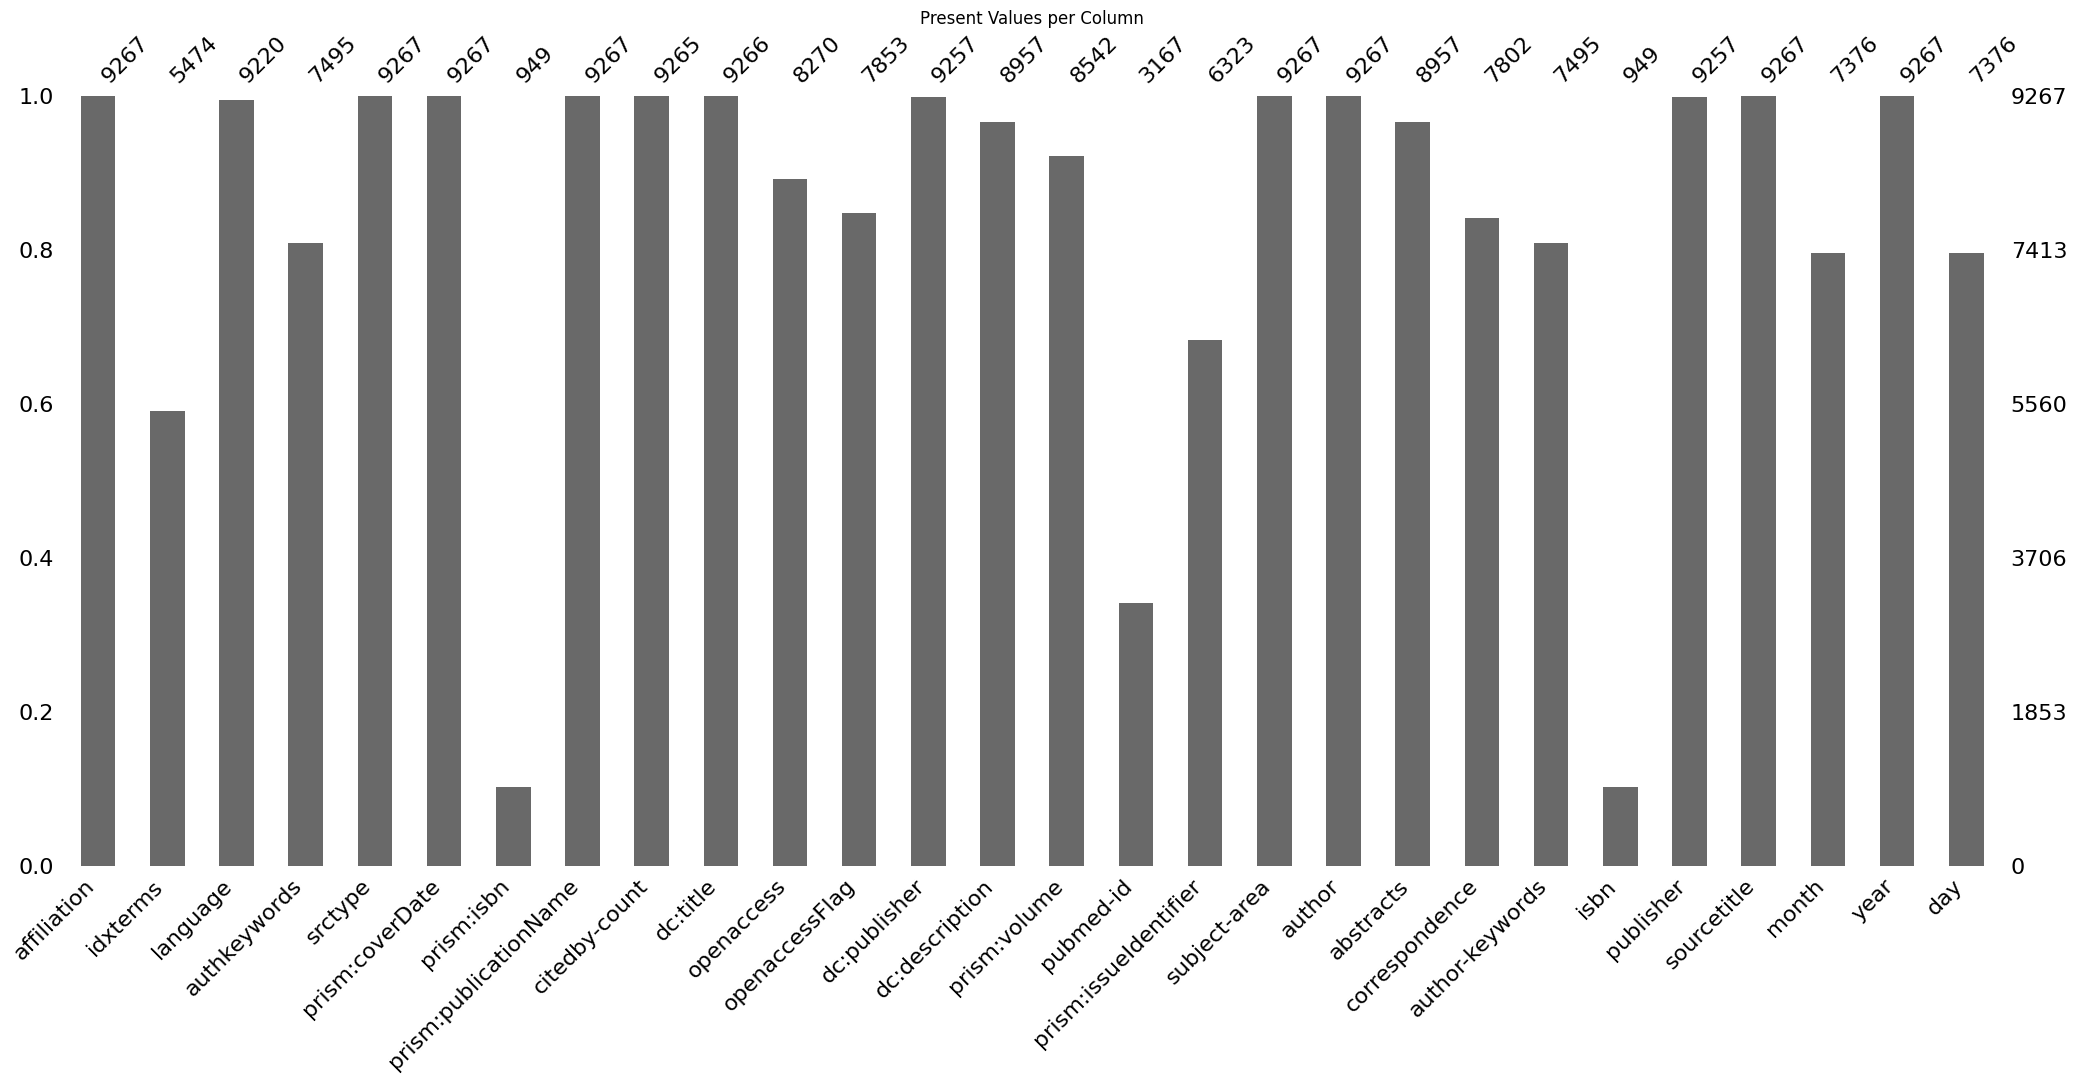

In [13]:
msno.bar(firstVisualization)
plt.title("Present Values per Column")
plt.show()


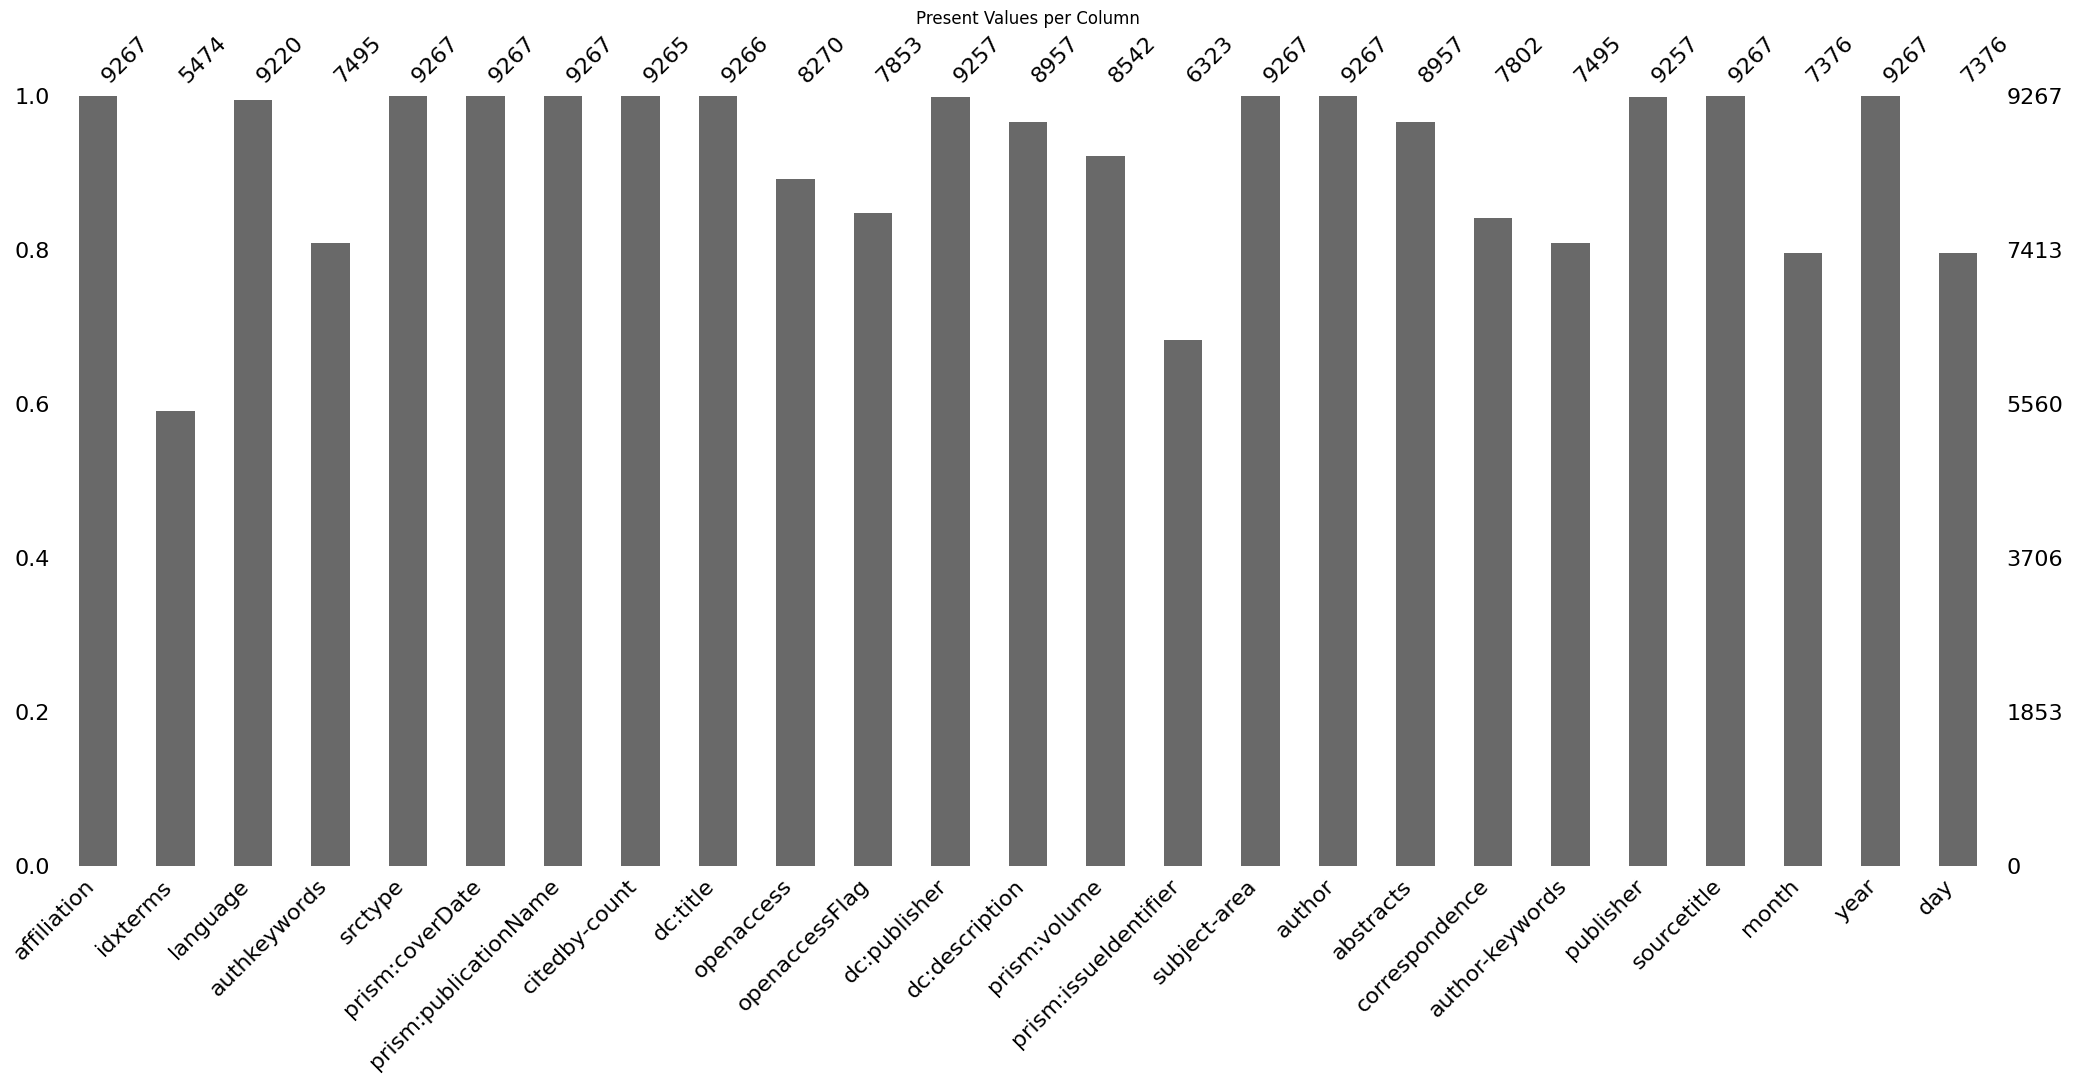

(9267, 25)


,affiliation,idxterms,language,authkeywords,srctype,prism:coverDate,prism:publicationName,citedby-count,dc:title,openaccess,openaccessFlag,dc:publisher,dc:description,prism:volume,prism:issueIdentifier,subject-area,author,abstracts,correspondence,author-keywords,publisher,sourcetitle,month,year,day
201800000,"[{'affiliation-city': 'Stanford', '@id': '6003...",None,{'@xml:lang': 'eng'},None,b,2018-12-31,"Radiology in Global Health: Strategies, Implem...",1,Public health and international epidemiology f...,0,false,Springer International Publishing,NaN,NaN,NaN,"[{'@_fa': 'true', '$': 'Medicine (all)', '@cod...","[{'ce:given-name': 'Krit', 'preferred-name': {...",None,"{'affiliation': {'country': 'Thailand', '@coun...",NaN,{'publishername': 'Springer International Publ...,"Radiology in Global Health: Strategies, Implem...",12,2018,31
201800001,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,p,2018-12-31,Progress in Electromagnetics Research Symposium,1,Flexible Printed Active Antenna for Digital Te...,0,false,Institute of Electrical and Electronics Engine...,This paper presents the development of a flexi...,2018-August,NaN,"[{'@_fa': 'true', '$': 'Electrical and Electro...","[{'ce:given-name': 'Teerapong', 'preferred-nam...","© 2018 The Institute of Electronics, Informati...",NaN,NaN,{'publishername': 'Institute of Electrical and...,Progress in Electromagnetics Research Symposium,12,2018,31
201800002,"{'affiliation-city': 'Bangkok', '@id': '600281...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...",j,2018-12-31,Chemical Engineering Science,21,Parametric study of hydrogen production via so...,0,false,Elsevier Ltd,Computational fluid dynamics was applied for s...,192,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Kiattikhoon', 'preferred-n...",© 2018 Elsevier LtdComputational fluid dynamic...,"{'affiliation': {'country': 'Thailand', 'posta...",{'author-keyword': [{'$': 'Circulating fluidiz...,{'publishername': 'Elsevier Ltd'},Chemical Engineering Science,12,2018,31
201800003,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...",j,2018-12-31,Applied Surface Science,37,Superhydrophobic coating from fluoroalkylsilan...,0,false,Elsevier B.V.,A superhydrophobic/superoleophilic mesh was su...,462,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Jittraporn', 'preferred-na...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"{'affiliation': {'country': 'Thailand', 'posta...","{'author-keyword': [{'$': 'Encapsulation', '@x...",{'publishername': 'Elsevier B.V.'},Applied Surface Science,12,2018,31
201800004,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...",j,2018-12-31,Analytica Chimica Acta,68,Electrochemical impedance-based DNA sensor usi...,0,false,Elsevier B.V.,A label-free electrochemical DNA sensor based ...,1044,NaN,"[{'@_fa': 'true', '$': 'Analytical Chemistry',...","[{'ce:given-name': 'Prinjaporn', 'preferred-na...",© 2018 Elsevier B.V. A label-free electrochemi...,"{'affiliation': {'country': 'United States', '...","{'author-keyword': [{'$': 'acpcPNA', '@xml:lan...",{'publishername': 'Elsevier B.V.'},Analytica Chimica Acta,12,2018,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202003388,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'Aged', '@weight': 'b', '@...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Che...",j,2020-01-01,Journal of Geriatric Oncology,6,"Characteristics, treatment patterns, prognosti...",1,true,Elsevier Ltd,Introduction: Peripheral T cell NHL (PTCL)

In [14]:
secondVisualization = firstVisualization.dropna(axis=1 ,thresh= 0.5*firstVisualization.shape[0])
msno.bar(secondVisualization)
plt.title("Present Values per Column")
plt.show()
print(secondVisualization.shape)
secondVisualization


In [15]:
selected_columns = ["citedby-count", "dc:title","srctype" , "openaccess", "subject-area", "authkeywords"]
testData1 = secondVisualization[selected_columns]
testData1["Age"] = (pd.to_numeric(secondVisualization["year"]) - 2024) * -1
testData1.dropna(subset=["citedby-count", "dc:title"],axis=0 , how="any",inplace=True)

C:\Users\chain\AppData\Local\Temp\ipykernel_36296\1634560575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData1["Age"] = (pd.to_numeric(secondVisualization["year"]) - 2024) * -1
C:\Users\chain\AppData\Local\Temp\ipykernel_36296\1634560575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData1.dropna(subset=["citedby-count", "dc:title"],axis=0 , how="any",inplace=True)


In [16]:
def flattenSubjectArea(l):
    if not isinstance(l,list):
        return ""
    result = ""
    for d in l:
        result += (d["$"] + ", ")
    return result.strip(", ")
def flattenKeywords(l):
    if not isinstance(l,dict):
        return ""
    result = ""
    l = l["author-keyword"]
    for d in l:
        try:
            result += d["$"] + ", "
        except:
            result += ""
    return result.strip(", ")
def get_feature(df:pd.DataFrame, cat_col):
    num_features = []
    text_features = []
    for col in df.columns:
        column = df[col]
        for data in column:
            if pd.isna(data):
                continue
            elif isinstance(data,int) or isinstance(data,float):
                num_features.append(col)
                break
            elif isinstance(data,str) and col not in cat_col:
                text_features.append(col)
                break
    return num_features,text_features

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import math

testData1['citedby-count'] = pd.to_numeric(testData1['citedby-count'], errors='coerce').fillna(0)
testData1["citedby-count"] = testData1["citedby-count"] + 1
testData1["citedby-count"] = np.log1p(testData1["citedby-count"])
testData1['openaccess'] = pd.to_numeric(testData1['openaccess'], errors='coerce').fillna(0)
testData1["subject-area"] = testData1["subject-area"].apply(flattenSubjectArea)
testData1["authkeywords"] = testData1["authkeywords"].apply(flattenKeywords)

# Clean text columns
testData1['dc:title'] = testData1['dc:title'].fillna('').astype(str)
testData1['subject-area'] = testData1['subject-area'].fillna('').astype(str)

# --- Feature/target split ---
X = testData1.drop(labels="citedby-count",axis = 1)
y = testData1['citedby-count']

# --- Column definitions ---
cat_features = ['srctype']
num_features,text_features = get_feature(X,cat_features)

# --- Transformers ---
char3_5 = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=1, max_features=30000)

text_transformers = [(f'{col}_tfidf',   char3_5, col) for col in text_features]

preprocessor = ColumnTransformer(
    transformers=[
        *text_transformers,
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
        ('num', StandardScaler(), num_features)
    ],
    remainder='drop'
)
preprocessPippeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])


(num_features,text_features)

C:\Users\chain\AppData\Local\Temp\ipykernel_36296\2269984541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData1['citedby-count'] = pd.to_numeric(testData1['citedby-count'], errors='coerce').fillna(0)
C:\Users\chain\AppData\Local\Temp\ipykernel_36296\2269984541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData1["citedby-count"] = testData1["citedby-count"] + 1
C:\Users\chain\AppData\Local\Temp\ipykernel_36296\2269984541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

(['openaccess', 'Age'], ['dc:title', 'subject-area', 'authkeywords'])

In [ ]:
upper , lower = testData1[testData1["citedby-count"] > testData1["citedby-count"].quantile(.99)] , testData1[testData1["citedby-count"] < testData1["citedby-count"].quantile(.2)] 
upper

In [ ]:
lower

In [18]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=.3)


In [19]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

def regression_report(y_test, y_pred,y_train, y_train_pred):
    print("=== Train Set ===")
    print("R² :", r2_score(np.expm1(y_train), np.expm1(y_train_pred)))
    print("MAE:", mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred)))
    print("RMSE:", root_mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred)))

    print("=== Test Set ===")
    print("R² :", r2_score(np.expm1(y_test), np.expm1(y_pred)))
    print("MAE:", mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
    print("RMSE:", root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


In [20]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, SGDRegressor, PoissonRegressor, TweedieRegressor
from sklearn.svm import LinearSVR
from sklearn.compose import TransformedTargetRegressor

In [21]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', Ridge(
        alpha=1.0,          
        fit_intercept=True,
        random_state=42
    ))
])

model.fit(X_train, y_train)

prediction = model.predict(X_test)

regression_report(y_test,prediction,y_train , model.predict(X_train))

=== Train Set ===
R² : 0.38811072539294045
MAE: 6.7111239168351435
RMSE: 27.405461212986307
=== Test Set ===
R² : 0.09269651656066791
MAE: 10.68967329931312
RMSE: 34.65123747003963


In [ ]:
# Cell: RidgeCV
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', RidgeCV(alphas=np.logspace(-3, 3, 13), fit_intercept=True))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: LassoCV
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LassoCV(
        alphas=np.logspace(-4, 1, 12),
        max_iter=5000,
        n_jobs=-1,
        random_state=42
    ))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: LinearSVR
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearSVR(
        C=1.0, epsilon=0.1, loss='squared_epsilon_insensitive', random_state=42
    ))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: SGDRegressor (Huber, elastic-net)
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', SGDRegressor(
        loss='huber', epsilon=1.35,
        penalty='elasticnet', l1_ratio=0.15,
        alpha=1e-5,
        max_iter=3000, early_stopping=True, n_iter_no_change=5,
        random_state=42
    ))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: PoissonRegressor
# Good when you model counts with log link; works with sparse X.
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', PoissonRegressor(alpha=1e-3, max_iter=1000, fit_intercept=True))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: TweedieRegressor (power=1.5, log-link)
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', TweedieRegressor(power=1.5, alpha=1e-4, link='log', max_iter=1000))
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Run once if not already
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


In [ ]:
# Cell: RandomForest baseline (no log1p)
reg = Pipeline(steps=[
    ('svd', TruncatedSVD(n_components=500, random_state=42)),
    ('scale', StandardScaler(with_mean=False)),  # standardize SVD components
    ('rf', RandomForestRegressor(
        n_estimators=600,
        max_depth=None,            # let it grow; adjust if overfitting
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ))
])

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', reg)
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
# Cell: RandomizedSearchCV on RF (no log1p)
base = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', Pipeline(steps=[
        ('svd', TruncatedSVD(n_components=600, random_state=42)),
        ('scale', StandardScaler(with_mean=False)),
        ('rf', RandomForestRegressor(
            n_estimators=800,
            n_jobs=-1, random_state=42
        ))
    ]))
])

param_dist = {
    'regressor__svd__n_components': randint(300, 800),
    'regressor__rf__n_estimators': randint(600, 1400),
    'regressor__rf__max_depth': randint(8, 30),          # try bounded depths
    'regressor__rf__min_samples_split': randint(2, 10),
    'regressor__rf__min_samples_leaf': randint(1, 6),
    'regressor__rf__max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8],
    'regressor__rf__bootstrap': [True, False]
}

search = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=25,               # bump to 50+ if you have time
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
prediction = best_model.predict(X_test)
regression_report(y_test, prediction, y_train, best_model.predict(X_train))


In [ ]:
# Cell: Wide RF (no log1p)
reg = Pipeline(steps=[
    ('svd', TruncatedSVD(n_components=700, random_state=42)),
    ('scale', StandardScaler(with_mean=False)),
    ('rf', RandomForestRegressor(
        n_estimators=1600,
        max_depth=15,              # shallower
        min_samples_split=5,
        min_samples_leaf=3,
        max_features=0.5,          # random subspace
        n_jobs=-1,
        random_state=42
    ))
])

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', reg)
])

model.fit(X_train, y_train)
prediction = model.predict(X_test)
regression_report(y_test, prediction, y_train, model.predict(X_train))


In [ ]:
for i in range(len(y_test)):
    print(f"actual : {math.expm1(y_test[i])} | prediction : {math.expm1(prediction[i])}")


In [22]:
secondVisualization


,affiliation,idxterms,language,authkeywords,srctype,prism:coverDate,prism:publicationName,citedby-count,dc:title,openaccess,openaccessFlag,dc:publisher,dc:description,prism:volume,prism:issueIdentifier,subject-area,author,abstracts,correspondence,author-keywords,publisher,sourcetitle,month,year,day
201800000,"[{'affiliation-city': 'Stanford', '@id': '6003...",None,{'@xml:lang': 'eng'},None,b,2018-12-31,"Radiology in Global Health: Strategies, Implem...",1,Public health and international epidemiology f...,0,false,Springer International Publishing,NaN,NaN,NaN,"[{'@_fa': 'true', '$': 'Medicine (all)', '@cod...","[{'ce:given-name': 'Krit', 'preferred-name': {...",None,"{'affiliation': {'country': 'Thailand', '@coun...",NaN,{'publishername': 'Springer International Publ...,"Radiology in Global Health: Strategies, Implem...",12,2018,31
201800001,"{'affiliation-city': 'Bangkok', '@id': '600281...","{'mainterm': [{'$': 'Antenna dimensions', '@we...",{'@xml:lang': 'eng'},None,p,2018-12-31,Progress in Electromagnetics Research Symposium,1,Flexible Printed Active Antenna for Digital Te...,0,false,Institute of Electrical and Electronics Engine...,This paper presents the development of a flexi...,2018-August,NaN,"[{'@_fa': 'true', '$': 'Electrical and Electro...","[{'ce:given-name': 'Teerapong', 'preferred-nam...","© 2018 The Institute of Electronics, Informati...",NaN,NaN,{'publishername': 'Institute of Electrical and...,Progress in Electromagnetics Research Symposium,12,2018,31
201800002,"{'affiliation-city': 'Bangkok', '@id': '600281...",{'mainterm': [{'$': 'Circulating fluidized bed...,{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Cir...",j,2018-12-31,Chemical Engineering Science,21,Parametric study of hydrogen production via so...,0,false,Elsevier Ltd,Computational fluid dynamics was applied for s...,192,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Kiattikhoon', 'preferred-n...",© 2018 Elsevier LtdComputational fluid dynamic...,"{'affiliation': {'country': 'Thailand', 'posta...",{'author-keyword': [{'$': 'Circulating fluidiz...,{'publishername': 'Elsevier Ltd'},Chemical Engineering Science,12,2018,31
201800003,"[{'affiliation-city': 'Hirosaki', '@id': '6003...","{'mainterm': [{'$': 'Core-shell morphologies',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Enc...",j,2018-12-31,Applied Surface Science,37,Superhydrophobic coating from fluoroalkylsilan...,0,false,Elsevier B.V.,A superhydrophobic/superoleophilic mesh was su...,462,NaN,"[{'@_fa': 'true', '$': 'Chemistry (all)', '@co...","[{'ce:given-name': 'Jittraporn', 'preferred-na...",© 2018 Elsevier B.V. A superhydrophobic/supero...,"{'affiliation': {'country': 'Thailand', 'posta...","{'author-keyword': [{'$': 'Encapsulation', '@x...",{'publishername': 'Elsevier B.V.'},Applied Surface Science,12,2018,31
201800004,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'acpcPNA', '@weight': 'b',...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'acp...",j,2018-12-31,Analytica Chimica Acta,68,Electrochemical impedance-based DNA sensor usi...,0,false,Elsevier B.V.,A label-free electrochemical DNA sensor based ...,1044,NaN,"[{'@_fa': 'true', '$': 'Analytical Chemistry',...","[{'ce:given-name': 'Prinjaporn', 'preferred-na...",© 2018 Elsevier B.V. A label-free electrochemi...,"{'affiliation': {'country': 'United States', '...","{'author-keyword': [{'$': 'acpcPNA', '@xml:lan...",{'publishername': 'Elsevier B.V.'},Analytica Chimica Acta,12,2018,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202003388,"[{'affiliation-city': 'Bangkok', '@id': '60028...","{'mainterm': [{'$': 'Aged', '@weight': 'b', '@...",{'@xml:lang': 'eng'},"{'author-keyword': [{'@_fa': 'true', '$': 'Che...",j,2020-01-01,Journal of Geriatric Oncology,6,"Characteristics, treatment patterns, prognosti...",1,true,Elsevier Ltd,Introduction: Peripheral T cell NHL (PTCL)